<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# ES2
#### Alumno: Matias Pardo Errecarret

## Consigna:
<img src="./consigna.png" align="center"  />

In [1]:
from IPython.display import IFrame
IFrame("./es2_res_analitica.pdf", width=900, height=1000)

In [1]:
import sympy as sp
from sympy.abc import s #importamos simbolo s
from IPython.display import display, Math

#Declaro simbolos variables
Vi, Vo, Vo1 ,Vo3 = sp.symbols("Vi, Vo, Vo1 ,Vo3")
G1, G2, G3, G4, Y1, C = sp.symbols("G1, G2, G3, G4, Y1, C")


aa = sp.solve([Vo3+Vo,
               Vo1*G3+Vo3*Y1,
               Vi*G1+Vo1*(Y1+G2)+Vo*G3], 
              [Vi, Vo, Vo1]) #Tuve que hacer que solucione uno de los Vo1 o Vo3 para que tenga
                             # en cuenta la segunda ecuacion.

transf_func = aa[Vo]/aa[Vi]

# Ejercicio ES2: Ackerber-Mosberg

tf_es2 = transf_func.subs(Y1, s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tf_es2)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf_es2_final = sp.Mul(k,num/den, evaluate=True)

print('')
print('################')
print('#      ES2     #')
print('################')
display(tf_es2_final)



################
#      ES2     #
################


-G1*G3/(C**2*(s**2 + G2*s/C + G3**2/C**2))

### Transferencia Butter de Orden 2

In [2]:
tf_es2 = tf_es2.subs(C, 1)
tf_es2 = tf_es2.subs(G3, 1)
tf_es2 = tf_es2.subs(G1, 1)
tf_es2 = tf_es2.subs(G2, sp.sqrt(2))

num, den = sp.fraction(sp.simplify(sp.expand(tf_es2)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf_es2_final = sp.Mul(k,num/den, evaluate=True)

print('')
print('################')
print('# ES2 Butter #')
print('################')
display(tf_es2_final)


################
# ES2 Butter #
################


-1/(s**2 + sqrt(2)*s + 1)

### Simulacion Numerica

<IPython.core.display.Math object>

<IPython.core.display.Math object>

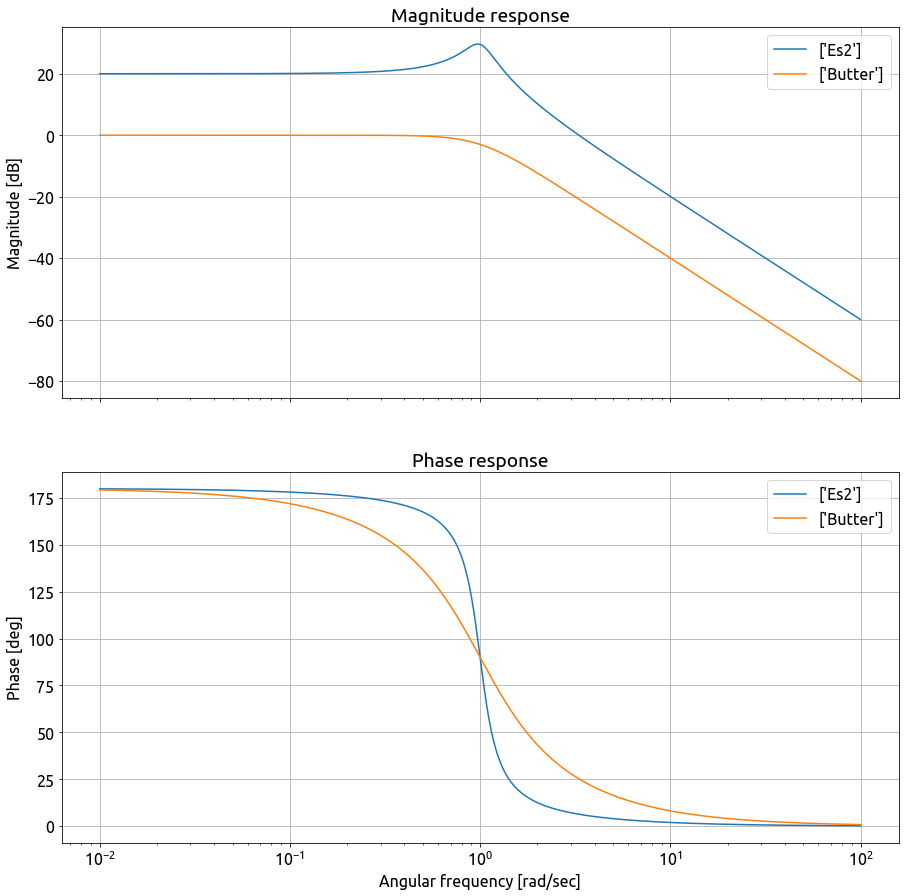

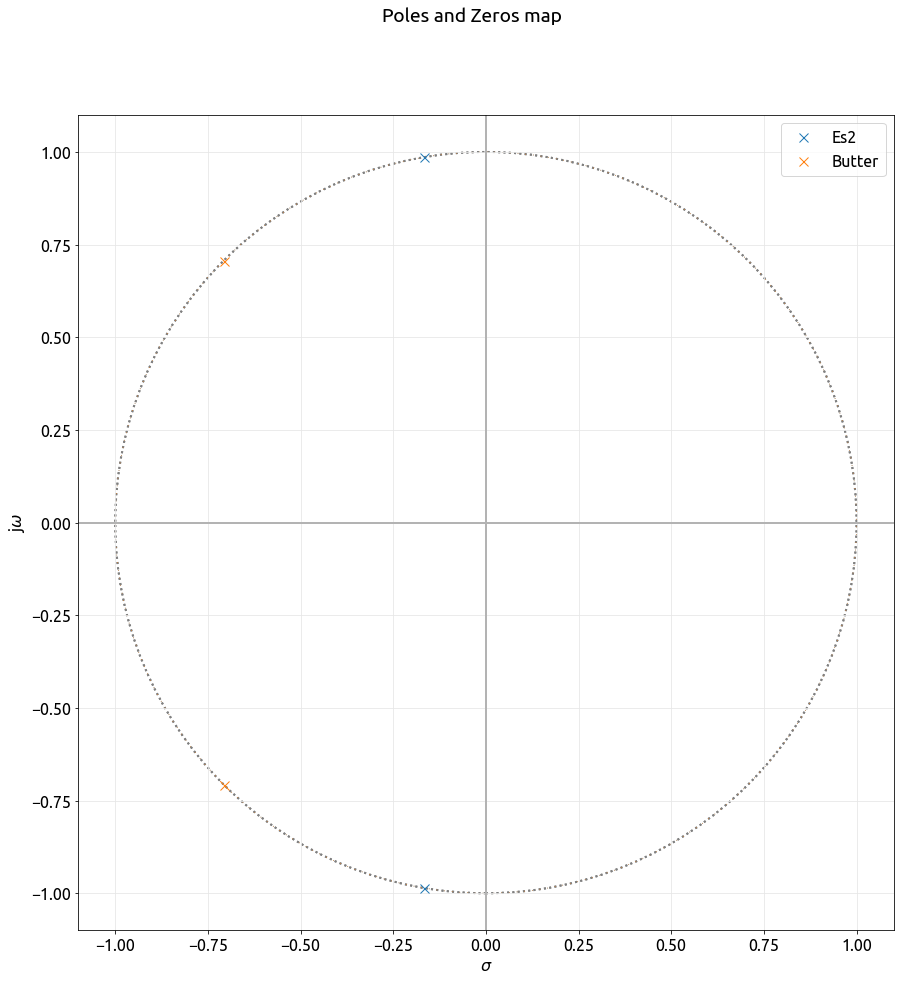

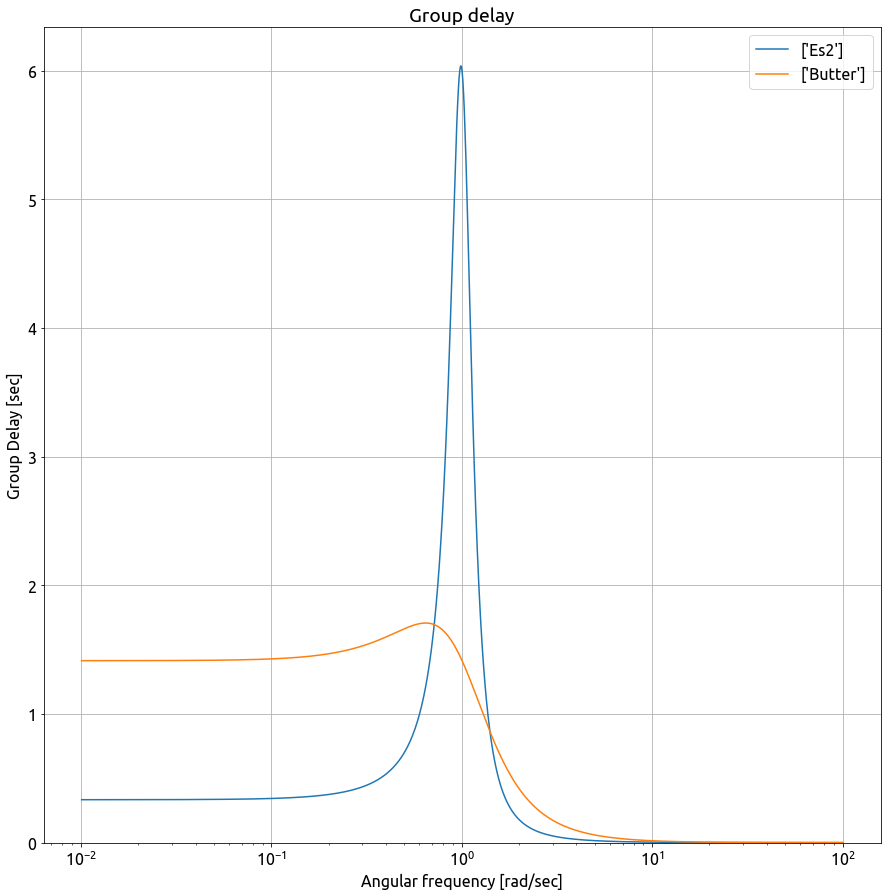

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_lti

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (15,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

all_sos = []

G1 = [10,1]
G2 = [1/3,np.sqrt(2)]
G3 = [1,1]
C  = [1,1]

for i in range(len(G1)):
    wo = G3[i]/C[i]
    q = G3[i]/G2[i]
    k = -G1[i]/G3[i]

    num = np.array([wo**2]) * k #YA multiplico por la constante 
    den = np.array([1,wo/q, wo**2])

    mi_sos = sig.TransferFunction(num,den)

    pretty_print_lti(mi_sos)

    all_sos += [mi_sos]
    
#plt.close('all')
analyze_sys(all_sos,['Es2','Butter'])